In [1]:

import pandas as pd # data analysis
import numpy as np  # for numerical data
import seaborn as sns # data visualization advanced
import matplotlib.pyplot as plt # basic

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler # Feature Scaling 
from sklearn.ensemble import RandomForestRegressor  # numeric and categoric data together
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os


In [2]:
excel_file = 'ghg_emissions.csv'  # Replace with actual path
years = range(2010, 2017)

# df = pd.read_excel(r"path_data.xlsx")

In [3]:
years[0]

2010

In [4]:
df_1 = pd.read_csv("ghg_emissions.csv")
df_1.head()


,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.467,0.046,0.513,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.025,0.000,0.026,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,4,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.199,0.024,0.223,NaN,4,2,1,4,1


In [5]:
df_2 = pd.read_csv("ghg_emissions.csv")
df_2.head()


,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.467,0.046,0.513,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.025,0.000,0.026,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,4,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.199,0.024,0.223,NaN,4,2,1,4,1


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ghg_emissions.csv")

# Add a "Source" column if needed (optional)
df['Source'] = 'Commodity'

# Add a "Year" column manually since it's a summary of 2016
df['Year'] = 2016

# Clean column names
df.columns = df.columns.str.strip()

# If the dataset already has 'Commodity Code' and 'Commodity Name', rename them
df.rename(columns={
    'Commodity Code': 'Code',
    'Commodity Name': 'Name'
}, inplace=True)

df.head()


,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.467,0.046,0.513,NaN,4,2,1,4,1,Commodity,2016
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.025,0.000,0.026,NaN,3,2,1,1,1,Commodity,2016
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1,Commodity,2016
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,4,2,1,4,1,Commodity,2016
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.199,0.024,0.223,NaN,4,2,1,4,1,Commodity,2016


In [7]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [8]:
# As there is no data avaialble in Unnamed coulmn so we will drop the column
df.drop(columns=['Unnamed: 7'],inplace=True)

In [9]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    264 non-null    object 
 1   Name                                                    264 non-null    object 
 2   Substance                                               264 non-null    object 
 3   Unit                                                    264 non-null    object 
 4   Supply Chain Emission Factors without Margins           264 non-null    float64
 5   Margins of Supply Chain Emission Factors                264 non-null    float64
 6   Supply Chain Emission Factors with Margins              264 non-null    float64
 7   DQ ReliabilityScore of Factors without Margins          264 non-null    int64  
 8   DQ TemporalCorrelation of Factors withou

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,264.0,0.077129,0.240289,0.0,0.0,0.002,0.04300,2.884
Margins of Supply Chain Emission Factors,264.0,0.003992,0.022153,0.0,0.0,0.000,0.00000,0.305
Supply Chain Emission Factors with Margins,264.0,0.081102,0.244245,0.0,0.0,0.002,0.04325,2.884
DQ ReliabilityScore of Factors without Margins,264.0,3.428030,0.560529,2.0,3.0,3.000,4.00000,4.000
DQ TemporalCorrelation of Factors without Margins,264.0,2.000000,0.000000,2.0,2.0,2.000,2.00000,2.000
DQ GeographicalCorrelation of Factors without Margins,264.0,1.000000,0.000000,1.0,1.0,1.000,1.00000,1.000
DQ TechnologicalCorrelation of Factors without Margins,264.0,2.825758,1.266691,1.0,1.0,3.000,4.00000,5.000
DQ DataCollection of Factors without Margins,264.0,1.000000,0.000000,1.0,1.0,1.000,1.00000,1.000
Year,264.0,2016.000000,0.000000,2016.0,2016.0,2016.000,2016.00000,2016.000


In [12]:
df.isnull().sum()

Code                                                      0
Name                                                      0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
Source                                                    0
Year                                                      0
dtype: int64

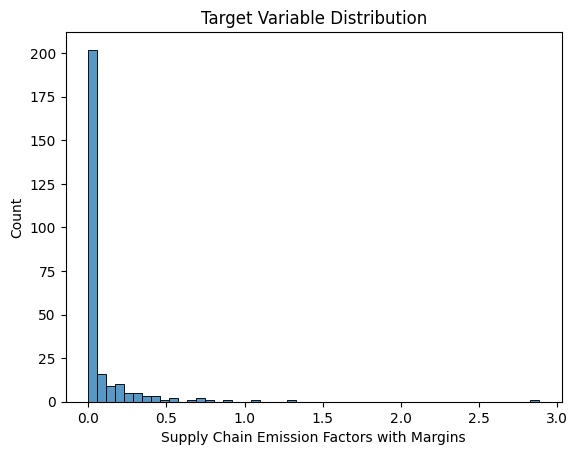

In [13]:
# Visualize distribution
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50)
plt.title('Target Variable Distribution')
plt.show()

In [14]:
# Check categorical variables
print(df['Substance'].value_counts())

Substance
carbon dioxide    66
methane           66
nitrous oxide     66
other GHGs        66
Name: count, dtype: int64


In [15]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         198
kg CO2e/2018 USD, purchaser price     66
Name: count, dtype: int64


In [16]:
print(df['Source'].value_counts())

Source
Commodity    264
Name: count, dtype: int64


In [17]:
df['Substance'].unique()

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [18]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3}

In [19]:
df['Substance']=df['Substance'].map(substance_map)

In [20]:
df['Substance'].unique()

array([0, 1, 2, 3])

In [21]:
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [22]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1}

In [23]:
df['Unit']=df['Unit'].map(unit_map)

In [24]:
print(df['Unit'].unique())

[0 1]


In [25]:
print(df['Source'].unique())

['Commodity']


In [26]:
source_map={'Commodity':0, 'Industry':1}

In [27]:
df['Source']=df['Source'].map(source_map)

In [28]:
print(df['Source'].unique())

[0]


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    264 non-null    object 
 1   Name                                                    264 non-null    object 
 2   Substance                                               264 non-null    int64  
 3   Unit                                                    264 non-null    int64  
 4   Supply Chain Emission Factors without Margins           264 non-null    float64
 5   Margins of Supply Chain Emission Factors                264 non-null    float64
 6   Supply Chain Emission Factors with Margins              264 non-null    float64
 7   DQ ReliabilityScore of Factors without Margins          264 non-null    int64  
 8   DQ TemporalCorrelation of Factors withou

In [30]:
df.Code.unique()

array(['111CA', '113FF', '211', '212', '213', '22', '23', '311FT',
       '313TT', '315AL', '321', '322', '323', '324', '325', '326', '327',
       '331', '332', '333', '334', '335', '3361MV', '3364OT', '337',
       '339', '42', '441', '445', '452', '481', '482', '483', '484',
       '485', '486', '487OS', '493', '4A0', '511', '512', '513', '514',
       '521CI', '523', '524', '525', '532RL', '5411', '5412OP', '5415',
       '55', '561', '562', '61', '621', '622', '623', '624', '711AS',
       '713', '721', '722', '81', 'HS', 'ORE'], dtype=object)

In [31]:
df.Name.unique()

array(['Farms', 'Forestry, fishing, and related activities',
       'Oil and gas extraction', 'Mining, except oil and gas',
       'Support activities for mining', 'Utilities', 'Construction',
       'Food and beverage and tobacco products',
       'Textile mills and textile product mills',
       'Apparel and leather and allied products', 'Wood products',
       'Paper products', 'Printing and related support activities',
       'Petroleum and coal products', 'Chemical products',
       'Plastics and rubber products', 'Nonmetallic mineral products',
       'Primary metals', 'Fabricated metal products', 'Machinery',
       'Computer and electronic products',
       'Electrical equipment, appliances, and components',
       'Motor vehicles, bodies and trailers, and parts',
       'Other transportation equipment', 'Furniture and related products',
       'Miscellaneous manufacturing', 'Wholesale trade',
       'Motor vehicle and parts dealers', 'Food and beverage stores',
       'General

In [32]:
len(df.Name.unique())

66

In [33]:
# Drop non-numeric columns not needed,
# Alos drop Code and Year columns since there is no need of both of the columns
df.drop(columns=['Name','Code','Year'], inplace=True)

In [34]:
df.shape

(264, 11)

In [35]:
# Define features and target
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']

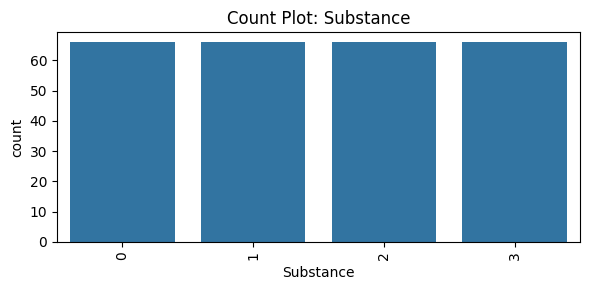

In [36]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

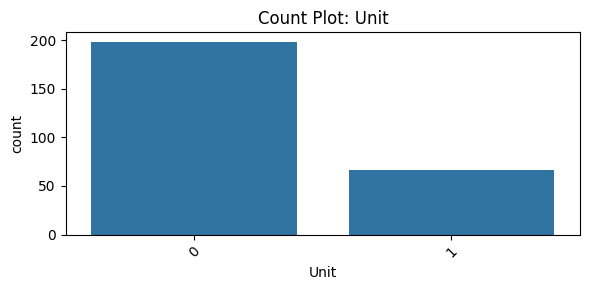

In [37]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


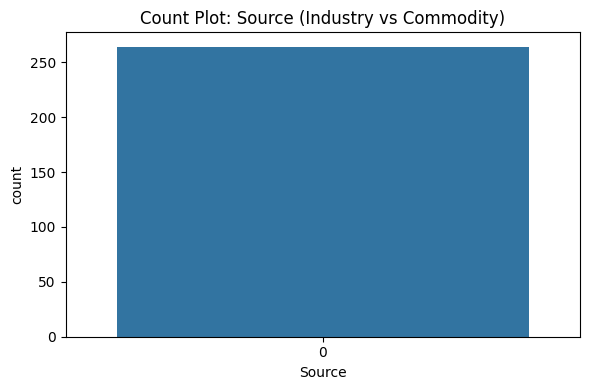

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

In [39]:
df.select_dtypes(include=np.number).corr()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000,0.774597,-0.407900,-0.241332,-0.423105,0.445097,NaN,NaN,0.466277,NaN,NaN
Unit,0.774597,1.000000,-0.168383,-0.104248,-0.175066,0.355716,NaN,NaN,0.584663,NaN,NaN
Supply Chain Emission Factors without Margins,-0.407900,-0.168383,1.000000,0.134369,0.995957,-0.113444,NaN,NaN,0.011492,NaN,NaN
Margins of Supply Chain Emission Factors,-0.241332,-0.104248,0.134369,1.000000,0.222834,-0.054549,NaN,NaN,0.064045,NaN,NaN
Supply Chain Emission Factors with Margins,-0.423105,-0.175066,0.995957,0.222834,1.000000,-0.116523,NaN,NaN,0.017153,NaN,NaN
DQ ReliabilityScore of Factors without Margins,0.445097,0.355716,-0.113444,-0.054549,-0.116523,1.000000,NaN,NaN,0.410687,NaN,NaN
DQ TemporalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,0.466277,0.584663,0.011492,0.064045,0.017153,0.410687,NaN,NaN,1.000000,NaN,NaN
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               264 non-null    int64  
 1   Unit                                                    264 non-null    int64  
 2   Supply Chain Emission Factors without Margins           264 non-null    float64
 3   Margins of Supply Chain Emission Factors                264 non-null    float64
 4   Supply Chain Emission Factors with Margins              264 non-null    float64
 5   DQ ReliabilityScore of Factors without Margins          264 non-null    int64  
 6   DQ TemporalCorrelation of Factors without Margins       264 non-null    int64  
 7   DQ GeographicalCorrelation of Factors without Margins   264 non-null    int64  
 8   DQ TechnologicalCorrelation of Factors w

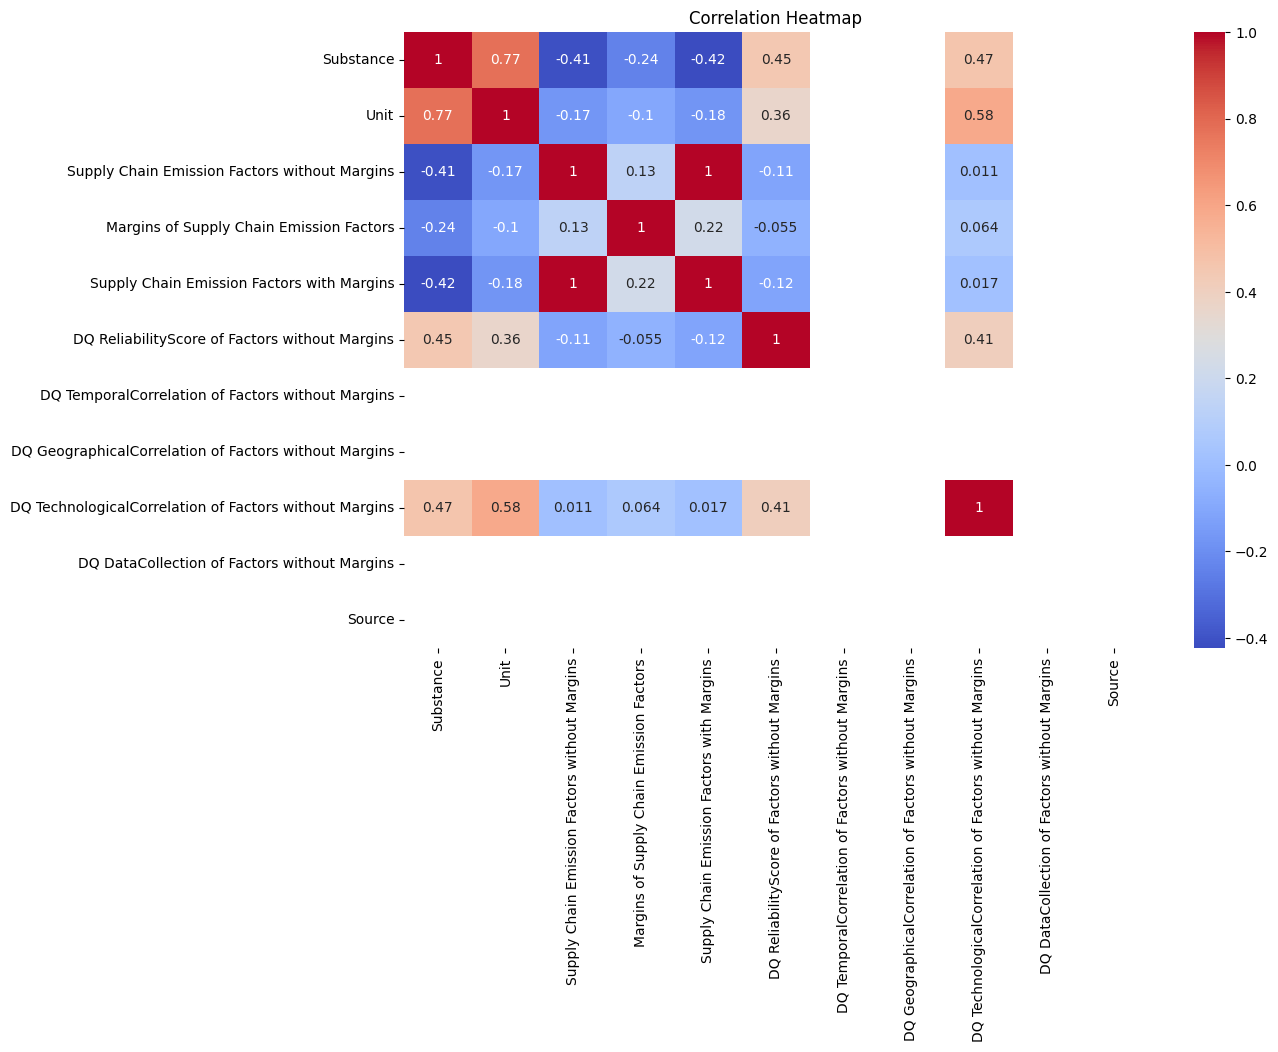

In [41]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [42]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
model = RandomForestRegressor(random_state=42)

In [45]:
# Try this before train_test_split
try:
    X = df.drop('Supply Chain Emission Factors with Margins', axis=1)
    y = df['Supply Chain Emission Factors with Margins']
    print("X shape:", X.shape)
    print("y shape:", y.shape)
except Exception as e:
    print("Error during X/y split:", e)


X shape: (264, 10)
y shape: (264,)


In [46]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
y_pred = model.predict(X_test)
# r2_sccore approx 1 gives us perfecr model

In [48]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

RMSE: 0.017915003144417782
R² Score: 0.9868413767391422


In [49]:
# When the model performs very well on the training data we say that it is overfit

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [50]:
y_pred_best = best_model.predict(X_test)

print("Final RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Final R²:", r2_score(y_test, y_pred_best))

Final RMSE: 0.01409220140154134
Final R²: 0.9918579388784097


In [51]:
!mkdir models

A subdirectory or file models already exists.


In [52]:
# Save model and encoders
joblib.dump(best_model, 'models/final_model.pkl')   
joblib.dump(scaler, 'models/scaler.pkl')


['models/scaler.pkl']

In [53]:
X.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')